In [244]:
import os
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import lightgbm as lgb

from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dropout
from tensorflow.keras import initializers

In [245]:
train_df = pd.read_csv('raw_com_modificacoes.csv', sep=',')

In [246]:
X = train_df.copy()

In [247]:
y = X.pop('TEMPO_SALA')

In [248]:
features_cat = ['DESC_CIRURGIA',
                'ESPECIALIDADE',
                'LOCAL_POS_CIR',
                'ANESTESIA',
                'TP_CIRURGIA']
                
                #['DESC_CIRURGIA']
                #['ESPECIALIDADE']
                #['LOCAL_POS_CIR']
                #['ANESTESIA']
                #['TP_CIRURGIA']
                
preprocessor = make_column_transformer(
    #(MinMaxScaler(), features_num),
    #(StandardScaler(), features_num),
    #(RobustScaler(), features_num),
    #(Normalizer(), features_num),

    (OneHotEncoder(), features_cat),
)

In [249]:
X = preprocessor.fit_transform(X)

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [1091]


In [250]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)

In [251]:
type(X_train), type(X_valid), type(y_train), type(y_valid)

(scipy.sparse.csr.csr_matrix,
 scipy.sparse.csr.csr_matrix,
 pandas.core.series.Series,
 pandas.core.series.Series)

## Linear regression

In [252]:
X_train = X_train.toarray()
X_valid = X_valid.toarray()

In [253]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

-3.2946732239643505e+19
[-2.13492579e+13 -2.13492579e+13  4.77493264e+13 ...  2.16291549e+14
  2.16291549e+14  2.16291549e+14]
-44375936968223.59


Inference in validation dataset

In [254]:
preds = reg.predict(np.array(X_valid))
preds

array([305.4375 , 267.21875, 245.21875, ..., 631.09375, 185.96875,
       169.03125])

In [255]:
y_pred = []
for x in range(len(preds)):
    y_pred.append(preds[x])
y_true = y_valid.values.tolist()

In [256]:
print(mean_absolute_error(y_true, y_pred))
print(mean_squared_error(y_true, y_pred))
print(r2_score(y_true, y_pred))

86555309538.74043
2.3596917477244986e+24
-1.0075962060523402e+20


In [257]:
y_30 = 0
for x in range(len(y_pred)):
    if y_pred[x] - y_true[x] > 30:
        y_30 = y_30+1
    elif y_pred[x] - y_true[x] < -30:
        y_30 = y_30+1
    else:
        pass
y_1 = 0
for x in range(len(y_pred)):
    if y_pred[x] - y_true[x] > 60:
        y_1 = y_1+1
    elif y_pred[x] - y_true[x] < -60:
        y_1 = y_1+1
    else:
        pass
y_2 = 0
for x in range(len(y_pred)):
    if y_pred[x] - y_true[x] > 120:
        y_2 = y_2+1
    elif y_pred[x] - y_true[x] < -120:
        y_2 = y_2+1
    else:
        pass

In [258]:
print('30 min: ',y_30/len(y_pred)*100)
print('1 hora: ',y_1/len(y_pred)*100)
print('2 horas: ',y_2/len(y_pred)*100)

30 min:  62.090336134453786
1 hora:  31.544117647058822
2 horas:  12.589285714285714


In [259]:
for x in range(len(y_pred)):
    if y_pred[x] > 1200:
        y_pred[x] = 1200
    elif y_pred[x] < 0:
        y_pred[x] = 0
            

In [260]:
y = pd.DataFrame()

In [261]:
y['y_true'] = y_true

In [262]:
y['y_pred'] = y_pred

In [263]:
y['dif'] = y.y_true - y.y_pred

In [264]:
y = y[y['y_pred']!=0]

In [265]:
y_true = y[(y['dif']>-400)&(y['dif']<400)].y_true.values.tolist()

In [266]:
y_pred = y[(y['dif']>-400)&(y['dif']<400)].y_pred.values.tolist()

/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


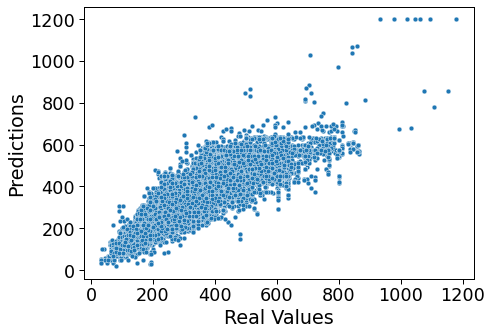

In [269]:
fig, ax = plt.subplots(figsize=(7,5))

sns.set_context("paper", font_scale=2.0) 
sns.scatterplot(y_true, y_pred, ax=ax);
ax.set_xlabel('Real Values');
ax.set_ylabel('Predictions');

fig.savefig('rlm.png', dpi=fig.dpi);

In [273]:
y_esperado = y_true

In [272]:
y_previsto= y_pred

In [274]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import numpy as np

def calcular_rmse(y_esperado, y_previsto):
    return np.sqrt(mean_squared_error(y_esperado, y_previsto))

def calcular_mape(y_esperado, y_previsto):
    y_esperado, y_previsto = np.array(y_esperado), np.array(y_previsto)
    return np.mean(np.abs((y_esperado - y_previsto) / y_esperado)) * 100

def calcular_metricas_regressao(y_esperado, y_previsto):
    msg = 'Métricas Regressão'
    print(msg)
    print('-' * len(msg))
    print(f'Mean Absolute Error - {mean_absolute_error(y_esperado, y_previsto)}')
    print(f'Root Mean Square Error - {calcular_rmse(y_esperado, y_previsto)}')
    print(f'Mean Absolute Percentage Error - {calcular_mape(y_esperado, y_previsto)}')

In [275]:
mean_absolute_error(y_esperado, y_previsto)

56.41820519284509

In [276]:
calcular_rmse(y_esperado, y_previsto)

77.87534763882381

In [277]:
calcular_mape(y_esperado, y_previsto)

19.724751672883112

In [278]:
calcular_metricas_regressao(y_esperado, y_previsto)

Métricas Regressão
------------------
Mean Absolute Error - 56.41820519284509
Root Mean Square Error - 77.87534763882381
Mean Absolute Percentage Error - 19.724751672883112
